In [ ]:
# Projeto da disciplina IF816 2020.3 -  
# O objetivo é prever a progressão da epidemia da doença coronavírus (Covid-19) no estado de Pernambuco.

##  Introdução

Este projeto tem como objetivo mofloatar como está a pandemia COVID-19 em Pernambuco e apresentar previsões de qual será a situação da pandemia no estado nas próximas semanas. No momento dia este projeto foi feito, o estado de Pernambuco, com uma população estimada de 9.616.621 pessoas, notificou 27235 casos confirmados de pessoas infectadas, 133.512 pessoas recuperadas e 8.438 mortos. O modelo matemático utilizado para as previsões utilizado é o SEIRD, S indicando o número de pessoas suscetíveis, I o número de pessoas infectadas, R o de recuperados, e D o número de mortes. Nas equações diferenciais utilizadas nas previsões, algumas constantes foram utilizadas, sendo elas β (taxa de infecção ), γ (probabilidade de recuperação), μ (taxa de letalidade), σ (taxa de indivíduos expostos). Vale lembrar que a pandemia COVID-19 é uma pandemia dinâmica, logo esses valores podem mudar drasticamente na medida que o tempo passa. Com todos os gráficos apresentados, que foram confloatuídos a partir das simulações, e com as comparações que foram feitas das diferentes medidas possíveis que podem ser adotadas para o enfrentamento da pandemia, esse projeto levanta a discussão e aponta quantas vidas poderiam ter sido salvas se uma postura diferente tivesse sido adotada no enfrentamento a COVID-19. Além disso, ele mostra diversos dados que foram obtidos a apartir do site do governo de Pernambuco, e com esses dados foram feitos alguns estudos estatísticos. 


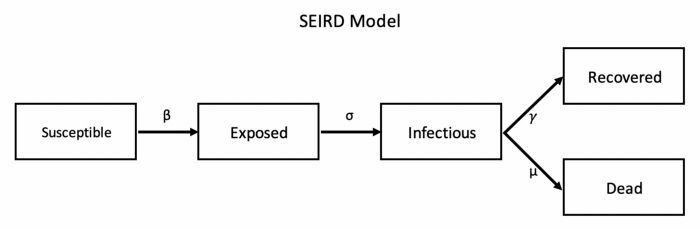

## Equações diferenciais do módelo SEIRD



\begin{align}
\frac{dS}{dt} = - \frac{\beta*S*I}{N}
\end{align}

\begin{align}
\frac{dE}{dt} =  \frac{\beta*S*I}{N} - \sigma*E
\end{align}

\begin{align}
\frac{dI}{dt} =  \sigma*E - \gamma*I - \mu*I
\end{align}

\begin{align}
\frac{dR}{dt} = \gamma*I
\end{align}

\begin{align}
\frac{dD}{dt} = \mu*I
\end{align}

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from wordcloud import WordCloud
from collections import Counter, OrderedDict
import pandas as pd
import string

In [3]:
#Inicialização das variáveis
N = 9616621                  #Número de cidadãos pernambucanos
R0 = 133512                  #Número de pessoas recuperadas
D0 = 8324                    #Número de óbitos 
E0 =5158                     #Número de pessoas expostas ao vírus
I0 = 153299 - R0 - D0 - E0   #Número de pessoas infectadas
S0 = N - I0 - R0 - D0 - E0   #Número de pessoas suscetíveis
gamma = 1./10.               #Probabilidade de recuperação
beta = 0.94/10.0             #Taxa de infecção
sigma = 0.5                  #Taxa de probabilidade de ficar exposto
mu = 0.03                    #Taxa de letalidade
t = np.linspace(0, 220, 220)

In [4]:
#Implementação das equações diferenciais
def deriv(y, t, N, beta, sigma, gamma, mu):
    S, E, I, R, D = y
    dSdt = -beta*S*I/N
    dEdt = beta*S*I/N - sigma*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I
    dDdt = mu*I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [5]:
y0 = S0, E0, I0, R0, D0
ret = odeint(deriv, y0, t, args = (N, beta, sigma, gamma, mu))
S, E, I, R, D = ret.T


# Simulações feitas com os dados obtidos do site do governo de Pernambuco, em 14/10/2020

## Gráfico do número de expostos!

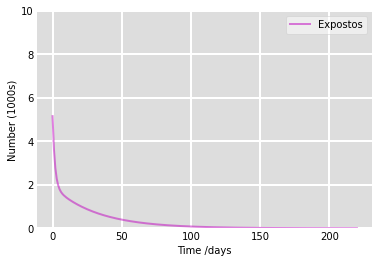

In [6]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, E/1000, 'm', alpha=0.5, lw=2, label='Expostos')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('expostos.png')
plt.show()

## Gráfico do número de Infectados!

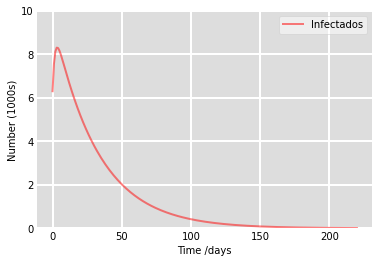

In [7]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infectados')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

## Gráfico de número de mortos

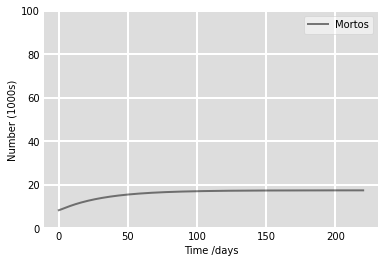

In [8]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, D/1000, 'k', alpha=0.5, lw=2, label='Mortos')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,100)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/Recuperados.png')
plt.show()

## Gráfico do número de Recuperados!

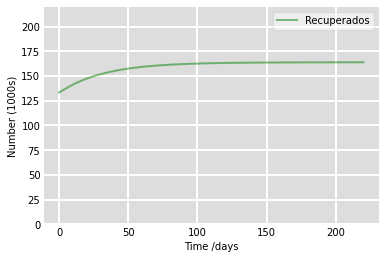

In [9]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,220)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/Recuperados.png')
plt.show()

## Gráfico do número de Suscetíveis!

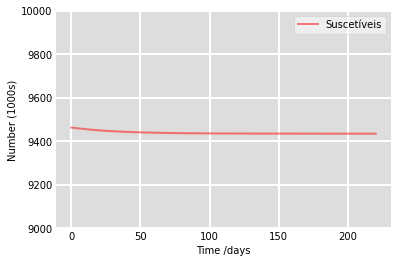

In [10]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'r', alpha=0.5, lw=2, label='Suscetíveis')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(9000,10000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/Suscetíveis.png')
plt.show()

In [11]:
# Base Geral de Dados de sfloatatica casos de coronavírus em Pernambuco
dataFrameGeral = pd.read_csv('basegeral.csv', sep=';')

# Base de dados geral da COVID-19 em Pernambuco do dia 23/04/2020 até 13/08/2020

In [12]:
dataFrameGeral.index = np.arange(1, len(dataFrameGeral) + 1)
dataFrameGeral

,dt_notificacao,Sexo,raca,municipio,dt_primeiros_sintomas,sintomas,comorbidades,hospitalizacao,classe,Resultado,evolucao,dt_obito,cd_municipio,faixa_etaria,tipo
1,2020-04-23,FEMININO,NaN,RECIFE,2020-04-13,FEBRE DOR DE GARGANTA CEFALEIA PERDA DE OLFA...,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaN,261160,20-29 anos,grave
2,2020-04-23,FEMININO,NaN,RECIFE,2020-04-18,DOR DE GARGANTA OUTROS,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaN,261160,60-69 anos,leve
3,2020-04-23,MASCULINO,NaN,RECIFE,2020-04-20,FEBRE TOSSE,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaN,261160,30-39 anos,leve
4,2020-04-23,FEMININO,NaN,RECIFE,NaN,NaN,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaN,261160,40-49 anos,grave
5,2020-04-23,MASCULINO,NaN,RECIFE,2020-04-09,TOSSE CEFALEIA,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaN,261160,50-59 anos,grave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519098,2020-09-24,MASCULINO,IGNORADO,IGUARACY,NaN,NaN,NaN,NaN,NEGATIVO,NEGATIVO,RECUPERADO,NaN,0,20-29 anos,leve
519099,2020-07-24,MASCULINO,PARDA,BELEM DE SAO FRANCISCO,NaN,NaN,NaN,NaN,NEGATIVO,NEGATIVO,RECUPERADO,NaN,260160,40-49 anos,leve
519100,2020-08-25,MASCULINO,PARDA,IGUARACY,NaN,NaN,NaN,NaN,NEGATIVO,NEGATIVO,RECUPERADO,NaN,0,40-49 anos,leve
519101,2020-07-31,MASCULINO,PARDA,BELEM DE SAO FRANCISCO,NaN,NaN,NaN,NaN,CONFIRMADO,POSITIVO,RECUPERADO,NaN,260160,70-79 anos,leve


In [13]:
# Base Geral de Dados de sintatica casos de coronavírus em Pernambuco
dataFrameCovid19 = pd.read_csv("COVID-19 em Dados.csv")

# Base de dados sintatica da COVID-19 EM Pernambuco, do dia 03/04/2020 até 08/11/2020

In [14]:
dataFrameCovid19.index = np.arange(1, len(dataFrameCovid19) + 1)
dataFrameCovid19

,dt_referencia,dt_atualizacao,confirmados,obitos,tx_obitos,recuperados,tx_recuperados,isolamento,tx_isolamento,enfermaria,tx_enfermaria,uti,tx_uti,testes_novos,testes_acumulados,tx_testes,leitos_uti,tx_oc_uti,leitos_enf,tc_oc_enf
1,2020-04-03,NaN,176,14,0.080,23,0.131,87,0.569,34,0.222,18,0.102,0,0,0,0,0.00,0,0.00
2,2020-04-04,NaN,201,21,0.104,25,0.124,87,0.494,49,0.278,19,0.094,0,0,0,0,0.00,0,0.00
3,2020-04-05,NaN,223,30,0.134,25,0.112,101,0.510,44,0.222,23,0.103,0,0,0,0,0.00,0,0.00
4,2020-04-06,NaN,352,34,0.097,32,0.091,166,0.519,94,0.294,26,0.074,0,0,0,0,0.00,0,0.00
5,2020-04-07,NaN,401,46,0.115,32,0.080,189,0.512,110,0.298,24,0.060,0,0,0,0,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2020-11-04,NaN,164222,8687,0.053,145804,0.888,71,0.004,950,0.052,78,0.000,5763,629638,65587,786,0.77,833,0.57
217,2020-11-05,NaN,165273,8711,0.053,146752,0.888,64,0.004,990,0.054,80,0.000,5766,635404,66188,786,0.79,833,0.55
218,2020-11-06,NaN,165922,8724,0.053,147528,0.889,70,0.004,965,0.052,79,0.000,6225,641629,66836,780,0.81,831,0.54
219,2020-11-07,NaN,166333,8732,0.052,147778,0.888,62,0.003,975,0.052,77,0.000,2883,644512,67137,780,0.82,831,0.55


## Taxas da COVID - 19 ao longo dos dias em Pernambuco

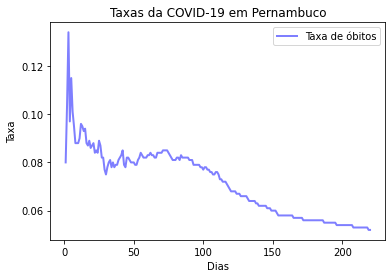

In [15]:
# plotando a taxa de óbitos 
plt.plot(dataFrameCovid19['tx_obitos'].index, dataFrameCovid19['tx_obitos'].values, 'b', alpha=0.5, lw=2, label='Taxa de óbitos')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/tx_obitos.png')
plt.show() 

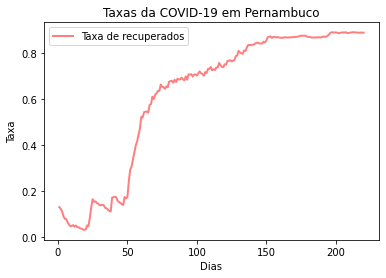

In [16]:
# plotando a taxa de recuperados  
plt.plot(dataFrameCovid19['tx_recuperados'].index, dataFrameCovid19['tx_recuperados'].values, 'r', alpha=0.5, lw=2, label='Taxa de recuperados')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/tx_recuperados.png')
plt.show() 



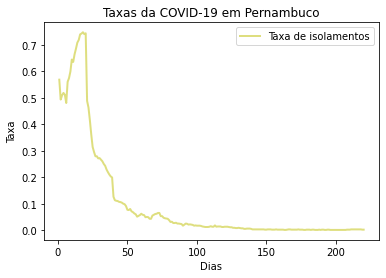

In [17]:
# plotando a taxa de isolamento 
plt.plot(dataFrameCovid19['tx_isolamento'].index, dataFrameCovid19['tx_isolamento'].values, 'y', alpha=0.5, lw=2, label='Taxa de isolamentos')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/tx_isolamento.png')
plt.show() 

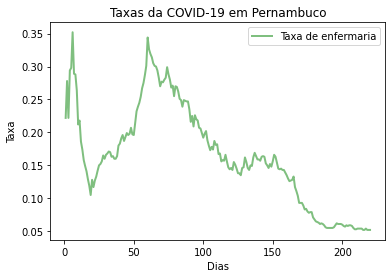

In [18]:
# plotando a taxa de enfermaria
plt.plot(dataFrameCovid19['tx_enfermaria'].index, dataFrameCovid19['tx_enfermaria'].values, 'g', alpha=0.5, lw=2, label='Taxa de enfermaria')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/tx_enfermaria.png')
plt.show()

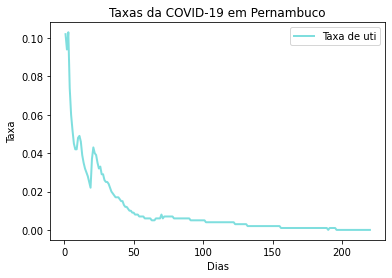

In [19]:
# plotando a taxa de uti
plt.plot(dataFrameCovid19['tx_uti'].index, dataFrameCovid19['tx_uti'].values, 'c', alpha=0.5, lw=2, label='Taxa de uti')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/tx_uti.png')
plt.show() 



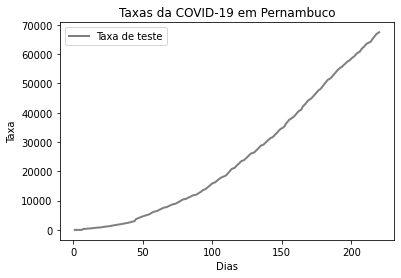

In [20]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['tx_testes'].index, dataFrameCovid19['tx_testes'].values, 'k', alpha=0.5, lw=2, label='Taxa de teste')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/tx_testes.png')
plt.show() 


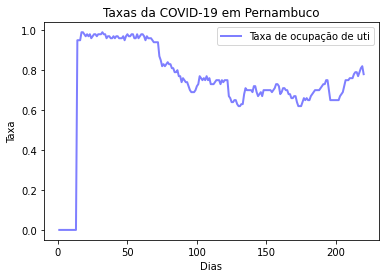

In [21]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['tx_oc_uti'].index, dataFrameCovid19['tx_oc_uti'].values, 'b', alpha=0.5, lw=2, label='Taxa de ocupação de uti')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da COVID-19 em Pernambuco') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/tx_oc_uti.png')
plt.show()


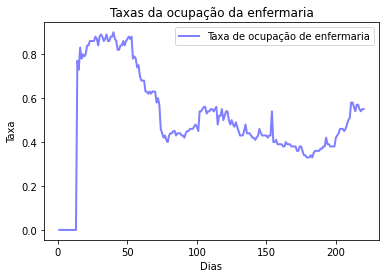

In [22]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['tc_oc_enf'].index, dataFrameCovid19['tc_oc_enf'].values, 'b', alpha=0.5, lw=2, label='Taxa de ocupação de enfermaria')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Taxa') 
plt.title('Taxas da ocupação da enfermaria') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/tc_oc_enf.png')
plt.show() 


## Agora usaremos dados fornecidos pelo governo para analisar o que aconteceu ao longo das últimas semanas

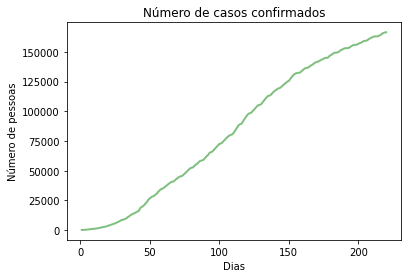

In [23]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['confirmados'].index, dataFrameCovid19['confirmados'].values, 'g', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de pessoas') 
plt.title('Número de casos confirmados') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/casos_confirmados.png')
plt.show() 


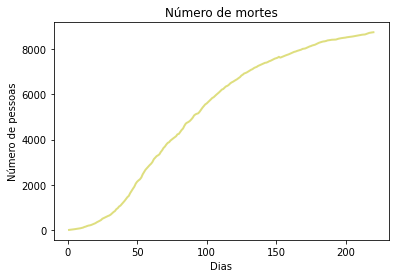

In [24]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['obitos'].index, dataFrameCovid19['obitos'].values, 'y', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de pessoas') 
plt.title('Número de mortes') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/numeroóbitos.png')
plt.show() 


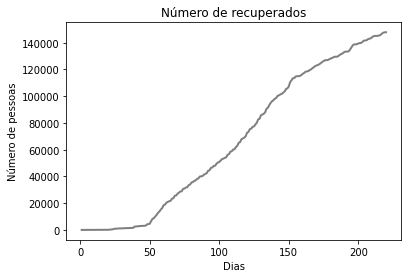

In [25]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['recuperados'].index, dataFrameCovid19['recuperados'].values, 'k', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de pessoas') 
plt.title('Número de recuperados') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/numerorecuperados.png')
plt.show() 


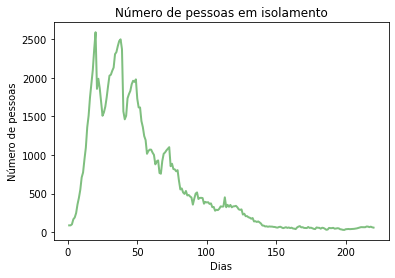

In [26]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['isolamento'].index, dataFrameCovid19['isolamento'].values, 'g', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de pessoas') 
plt.title('Número de pessoas em isolamento') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/isolamento.png')
plt.show() 


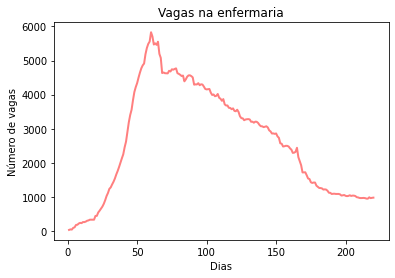

In [27]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['enfermaria'].index, dataFrameCovid19['enfermaria'].values, 'r', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de vagas') 
plt.title('Vagas na enfermaria') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/vagas_enfermaria.png')
plt.show() 


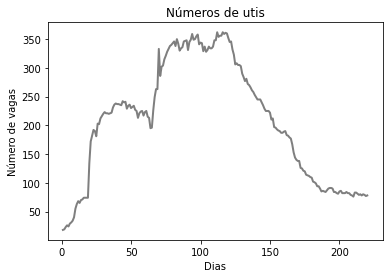

<Figure size 432x288 with 0 Axes>

In [28]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['uti'].index, dataFrameCovid19['uti'].values, 'k', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de vagas') 
plt.title('Números de utis') 
plt.show() 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/número_utis.png')
plt.savefig('r_uti')

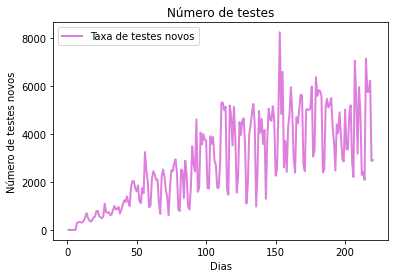

In [29]:
# plotando a taxa de uti
plt.plot(dataFrameCovid19['testes_novos'].index, dataFrameCovid19['testes_novos'].values, 'm', alpha=0.5, lw=2, label='Taxa de testes novos')
plt.legend()
plt.xlabel('Dias') 
plt.ylabel('Número de testes novos') 
plt.title('Número de testes') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/testes_novos.png')
plt.show() 



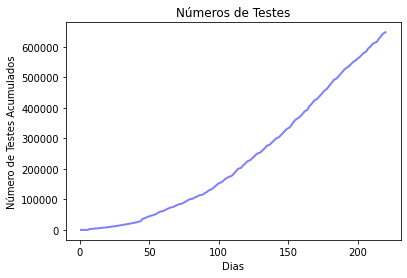

In [30]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['testes_acumulados'].index, dataFrameCovid19['testes_acumulados'].values, 'b', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de Testes Acumulados') 
plt.title('Números de Testes') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/testes_acumulados.png')
plt.show() 


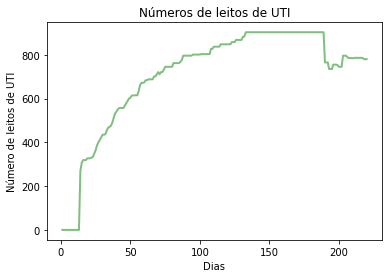

In [31]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['leitos_uti'].index, dataFrameCovid19['leitos_uti'].values, 'g', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de leitos de UTI') 
plt.title('Números de leitos de UTI') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/leitos_uti.png')
plt.show() 


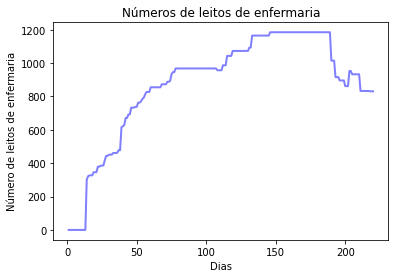

In [32]:
# plotando a taxa de teste
plt.plot(dataFrameCovid19['leitos_enf'].index, dataFrameCovid19['leitos_enf'].values, 'b', alpha=0.5, lw=2)
plt.xlabel('Dias') 
plt.ylabel('Número de leitos de enfermaria') 
plt.title('Números de leitos de enfermaria') 
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/leitos_uti.png')
plt.show() 


# Comparação entre a minha simulação e os dados reais obtidos a partir do banco de dados do governo de Pernambuco

### Comparação entre o número de óbitos

In [33]:
dados = dataFrameCovid19['obitos'].values
dias = dataFrameCovid19['obitos'].index

##### Podemos observar que o número de óbitos no dia de hoje se aproxima muito do valor inicial que utilizamos para fazer a previsão. 

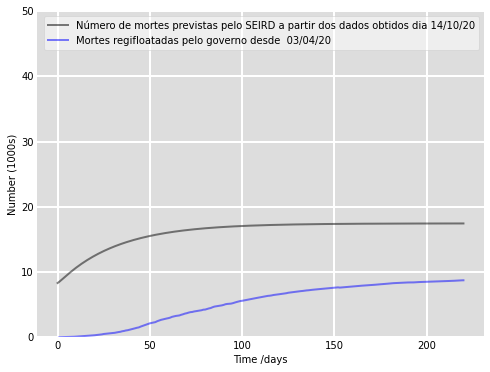

In [47]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, D/1000, 'k', alpha=0.5, lw=2, label='Número de mortes previstas pelo SEIRD a partir dos dados obtidos dia 14/10/20')
ax.plot(dias, dados/1000, 'b', alpha=0.5, lw=2, label='Mortes regifloatadas pelo governo desde  03/04/20')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,50)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.rcParams["figure.figsize"] =(7,5)    
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/comparação_mortos.png')
plt.show()

### Comparação entre o número de recuperados

In [35]:
dados1 = dataFrameCovid19['recuperados'].values
dias1 = dataFrameCovid19['recuperados'].index

##### Podemos observar que a curva fornecida pela simulação e a de dados reais estão cada vez mais próximas com o passar dos dias. 

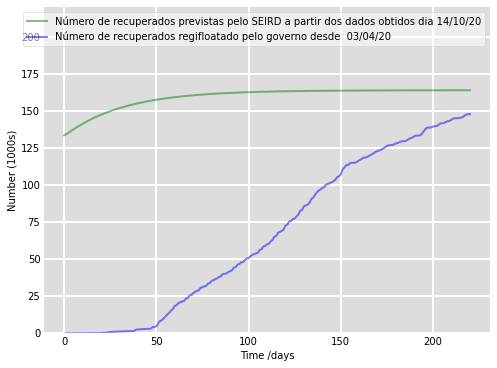

In [36]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Número de recuperados previstas pelo SEIRD a partir dos dados obtidos dia 14/10/20')
ax.plot(dias1, dados1/1000, 'b', alpha=0.5, lw=2, label='Número de recuperados regifloatado pelo governo desde  03/04/20')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,220)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.rcParams["figure.figsize"] =(12,9)
plt.savefig('C:/Users/jeffi/OneDrive/Área de Trabalho/COVID-19-no-estado-de-Pernambuco/Gráficos/comparação_recuperados.png')
plt.show()

# Alguns dados estatísticos sobre a COVID-19 em Pernambuco

In [37]:
#preenchimento dos vetores
dt_notificacao = dataFrameGeral['dt_notificacao']
raca = dataFrameGeral['raca']
municipio = dataFrameGeral['municipio']
dt_primeiros_sintomas = dataFrameGeral['dt_primeiros_sintomas']
sintomas = dataFrameGeral['sintomas']
comorbidades = dataFrameGeral['comorbidades']
hospitalizacao = dataFrameGeral['hospitalizacao']
classe = dataFrameGeral['classe']
Resultado = dataFrameGeral['Resultado']
evolucao = dataFrameGeral['evolucao']
dt_obito = dataFrameGeral['dt_obito']
cd_municipio = dataFrameGeral['cd_municipio']

In [48]:
UP_10 = 0 ; in11_19 = 0; in20_29 = 0; in30_39 = 0; in40_49 = 0; in50_59 = 0; in60_69 = 0; in70_79 = 0; in80_89 = 0; in90_99 = 0; in100_120 = 0

for i in dataFrameGeral['faixa_etaria'].values:
    if i == '0-10 anos':
        UP_10 += 1
    elif i == '11-19 anos':
        in11_19 += 1
    elif i == '20-29 anos':
        in20_29 += 1
    elif i == '30-39 anos':
        in30_39 += 1
    elif i == '40-49 anos':
        in40_49 += 1
    elif i == '50-59 anos':
        in50_59 += 1
    elif i == '60-69 anos':
        in60_69 += 1
    elif i == '70-79 anos':
        in70_79 += 1
    elif i == '80-89 anos':
        in80_89 += 1
    elif i == '90-99 anos':
        in90_99 += 1
    elif i == '100-120 anos':
        in100_120 += 1               

### Gráfico em forma de pizza mostrando a distribuição da faixa etária das pessoas com COVID-19 em Pernambuco

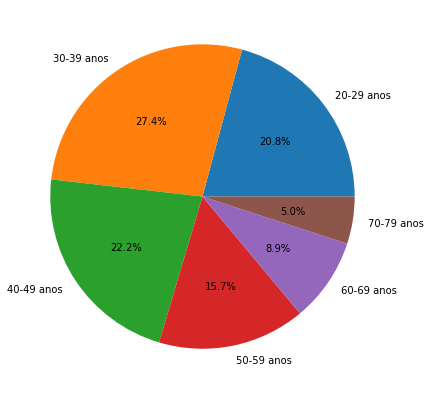

In [39]:
# Creating dataset 
idades = ['20-29 anos', '30-39 anos', '40-49 anos', '50-59 anos', '60-69 anos', '70-79 anos'] 
data = [float(in20_29), float(in30_39), float(in40_49), float(in50_59), float(in60_69), float(in70_79)] 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = idades, autopct='%1.1f%%') 
plt.show() 

##### Não houveram casos relatados de pessoas com idade entre 0-10 anos, 11-19 anos, 80-89 anos, 90-99 anos, e 100-120 nos dados coletados do governo de Pernambuco.

### Gráfico em forma de pizza mostrando a distribuição de covid 19 entre os sexos em Pernambuco

In [40]:
feminino = 0; masculino = 0; outro = 0;

for i in dataFrameGeral['Sexo'].values:
    if i == 'FEMININO':
        feminino += 1
    elif i == 'MASCULINO':
        masculino += 1


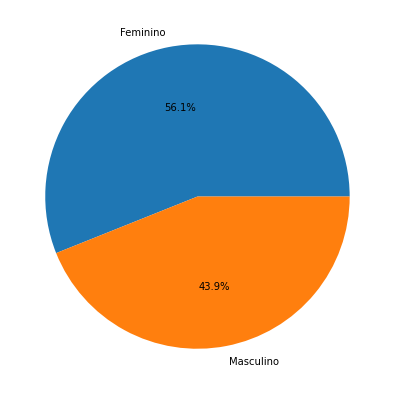

In [41]:
# Creating dataset 
idades = ['Feminino', 'Masculino'] 
data = [float(feminino), float(masculino)] 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = idades, autopct='%1.1f%%') 
plt.show() 

##### Note - se que no estado de Pernambuco o número de mulheres que chegaram de alguma forma a se envolver com a covid-19 é considerávelmente maior do que o de homens 

In [42]:
casosPorCidade = dict(Counter(dataFrameGeral['municipio'].values))

In [43]:
c = Counter({'RECIFE': 137989,
 'CAMARAGIBE': 6339,
 'OUTRO ESTADO': 5,
 'Não identificado': 10,
 'PAULISTA': 12977,
 'BELO JARDIM': 3752,
 'OLINDA': 19188,
 'JABOATAO DOS GUARARAPES': 23623,
 'GOIANA': 3457,
 'ITAMBE': 1791,
 'VICENCIA': 694,
 'PAUDALHO': 1827,
 'SAO LOURENCO DA MATA': 3863,
 'CABO DE SANTO AGOSTINHO': 5284,
 'SERRA TALHADA': 13089,
 'ITAPISSUMA': 1113,
 'TIMBAUBA': 4488,
 'SALGUEIRO': 9050,
 'LIMOEIRO': 3238,
 'ARCOVERDE': 7435,
 'CHA GRANDE': 465,
 'ESCADA': 1217,
 'SANTA CRUZ DO CAPIBARIBE': 8478,
 'ABREU E LIMA': 2895,
 'ALAGOINHA': 898,
 'IPOJUCA': 2149,
 'CARUARU': 29055,
 'MACHADOS': 426,
 'CORTES': 558,
 'RIBEIRAO': 626,
 'VITORIA DE SANTO ANTAO': 4861,
 'MORENO': 1517,
 'CAMOCIM DE SAO FELIX': 599,
 'AGUAS BELAS': 1829,
 'POMBOS': 1241,
 'BEZERROS': 1711,
 'OURICURI': 2974,
 'AGUA PRETA': 1785,
 'FERNANDO DE NORONHA': 1376,
 'PETROLINA': 13207,
 'ILHA DE ITAMARACA': 1261,
 'BARREIROS': 790,
 'TORITAMA': 1483,
 'PALMARES': 3835,
 'JUREMA': 508,
 'IGARASSU': 2603,
 'LAJEDO': 1162,
 'JOAO ALFREDO': 953,
 'ALTINHO': 1360,
 'VERDEJANTE': 1062,
 'ARACOIABA': 475,
 'FEIRA NOVA': 912,
 'JOAQUIM NABUCO': 971,
 'ALIANCA': 1503,
 'SAO JOAQUIM DO MONTE': 817,
 'SANTA FILOMENA': 676,
 'PESQUEIRA': 5126,
 'AMARAJI': 516,
 'BONITO': 1518,
 'PETROLANDIA': 2188,
 'TERRA NOVA': 1754,
 'GRAVATA': 2931,
 'SAO JOSE DA COROA GRANDE': 922,
 'LAGOA DO ITAENGA': 562,
 'TRINDADE': 1546,
 'GARANHUNS': 9719,
 'GLORIA DO GOITA': 1051,
 'CACHOEIRINHA': 593,
 'MACAPARANA': 837,
 'OROBO': 500,
 'SIRINHAEM': 1053,
 'CARPINA': 2234,
 'CABROBO': 1674,
 'SERTANIA': 2628,
 'JATAUBA': 848,
 'BOM JARDIM': 2369,
 'QUIPAPA': 944,
 'BOM CONSELHO': 1763,
 'RIO FORMOSO': 710,
 'AGRESTINA': 1550,
 'ITAQUITINGA': 578,
 'TRACUNHAEM': 126,
 'VERTENTE DO LERIO': 248,
 'NAZARE DA MATA': 872,
 'CHA DE ALEGRIA': 526,
 'SANTA MARIA DA BOA VISTA': 1502,
 'CANHOTINHO': 892,
 'VERTENTES': 327,
 'PARNAMIRIM': 1127,
 'ITACURUBA': 285,
 'VENTUROSA': 1749,
 'SAIRE': 532,
 'IATI': 298,
 'IBIMIRIM': 1177,
 'LAGOA DO OURO': 381,
 'FREI MIGUELINHO': 895,
 'CUSTODIA': 874,
 'SURUBIM': 3177,
 'CAMUTANGA': 688,
 'BREJO DA MADRE DE DEUS': 2662,
 'BARRA DE GUABIRABA': 623,
 'ARARIPINA': 6937,
 'JUCATI': 513,
 'EXU': 2074,
 'IBIRAJUBA': 117,
 'PASSIRA': 1596,
 'CUPIRA': 2248,
 'SAO BENTO DO UNA': 1519,
 'PRIMAVERA': 314,
 'CONDADO': 3589,
 'TAMANDARE': 809,
 'BUIQUE': 2315,
 'GAMELEIRA': 815,
 'TUPANATINGA': 1065,
 'PANELAS': 890,
 'QUIXABA': 605,
 'LAGOA DO CARRO': 392,
 'SANTA CRUZ': 599,
 'XEXEU': 1110,
 'CATENDE': 1312,
 'TAQUARITINGA DO NORTE': 633,
 'SANTA TEREZINHA': 961,
 'POCAO': 367,
 'ITAPETIM': 918,
 'SAO CAITANO': 1624,
 'PEDRA': 1708,
 'CAETES': 1234,
 'SAO JOSE DO EGITO': 2110,
 'CAPOEIRAS': 1650,
 'BODOCO': 1617,
 'BREJINHO': 705,
 'SOLIDAO': 907,
 'TACARATU': 1323,
 'AFOGADOS DA INGAZEIRA': 4924,
 'IPUBI': 1335,
 'CARNAIBA': 2486,
 'CASINHAS': 267,
 'TACAIMBO': 499,
 'SANHARO': 1740,
 'FERREIROS': 755,
 'SAO JOSE DO BELMONTE': 2932,
 'SAO VICENTE FERRER': 1718,
 'RIACHO DAS ALMAS': 1102,
 'SANTA MARIA DO CAMBUCA': 914,
 'MARAIAL': 640,
 'SAO BENEDITO DO SUL': 548,
 'BREJAO': 154,
 'DORMENTES': 1100,
 'PARANATAMA': 1103,
 'SALGADINHO': 241,
 'IGUARACI': 30,
 'LAGOA DOS GATOS': 654,
 'SERRITA': 1657,
 'BUENOS AIRES': 151,
 'TUPARETAMA': 282,
 'SALOA': 458,
 'AFRANIO': 1042,
 'LAGOA GRANDE': 1476,
 'ITAIBA': 1112,
 'MOREILANDIA': 519,
 'JUPI': 999,
 'JATOBA': 1196,
 'FLORESTA': 1703,
 'JAQUEIRA': 595,
 'TEREZINHA': 458,
 'INAJA': 503,
 'OROCO': 195,
 'TABIRA': 2314,
 'ANGELIM': 505,
 'SAO JOAO': 686,
 'CEDRO': 2693,
 'CORRENTES': 242,
 'CUMARU': 453,
 'MIRANDIBA': 1079,
 'BELEM DE MARIA': 355,
 'FLORES': 842,
 'PALMEIRINA': 125,
 'CALCADO': 319,
 'INGAZEIRA': 397,
 'BETANIA': 539,
 'MANARI': 218,
 'GRANITO': 364,
 'CARNAUBEIRA DA PENHA': 441,
 'CALUMBI': 474,
 'BELEM DE SAO FRANCISCO': 1092,
 'TRIUNFO': 1589,
 'SANTA CRUZ DA BAIXA VERDE': 728,
 'IGUARACY': 1058})

In [44]:
y = OrderedDict(c.most_common())
NumeroDecasosPorCidades = pd.DataFrame.from_records(list(dict(y).items()), columns=['Cidade','Número de casos'])

## Número de casos de covid 19 por cidade em Pernambuco

In [45]:
NumeroDecasosPorCidades.index = np.arange(1, len(NumeroDecasosPorCidades) + 1)
NumeroDecasosPorCidades

,Cidade,Número de casos
1,RECIFE,137989
2,CARUARU,29055
3,JABOATAO DOS GUARARAPES,23623
4,OLINDA,19188
5,PETROLINA,13207
...,...,...
184,PALMEIRINA,125
185,IBIRAJUBA,117
186,IGUARACI,30
187,Não identificado,10
